CNN (가장 기본적인 컨볼루션 연산 구현)

In [1]:
import numpy as np

# 입력 데이터 생성 (5x5)
input_data = np.array([
    [15,  0, 0, 0, 15],
    [15,  55, 69, 89, 15],
    [15,  58, 68, 88, 15],
    [15,  57, 67, 87, 15],
    [15,  0, 0, 0, 15]
])

# 필터 생성 (3x3)
filter_data = np.array([
    [-1, 0, 1],
    [1, -1, 0],
    [0, 1, -1]
])

# 아웃풋 행렬 생성 (5x5, 초기값 0)
output_data = np.zeros_like(input_data)

# 입력 데이터와 필터의 크기
input_size = input_data.shape[0]
filter_size = filter_data.shape[0]

# 컨볼루션 연산
for i in range(input_size - filter_size + 1):
    for j in range(input_size - filter_size + 1):
        # 입력 데이터와 필터의 해당 부분을 가져옴
        input_patch = input_data[i:i+filter_size, j:j+filter_size] 
         
        # 컨볼루션 연산 수행
        output_value = np.sum ( (input_patch * filter_data) )
        #print(output_value)
        #print(input_patch)
        #print(filter_data)
        
        # 아웃풋 행렬에 결과 저장
        output_data[i+1, j+1] = output_value
 
# 결과 출력
print("\nOutput Data (After Convolution):")
print(output_data)



Output Data (After Convolution):
[[  0   0   0   0   0]
 [  0 -65 -34  68   0]
 [  0   1   4  -2   0]
 [  0  11  20 -88   0]
 [  0   0   0   0   0]]


 CNN (연산을 리스트를 이용해서 구현  striped구현

In [2]:
import numpy as np

# 입력 데이터 생성 (5x5)
input_data = np.array([
    [10, 20, 30, 40, 50],
    [119,  19, 29, 39, 49], #9
    [118,  18, 28, 38, 48], #8 
    [117,  17, 27, 37, 47], #7
    [116,  16, 26, 36, 46] # 6
])

# 필터 생성 (3x3)
filter_data = np.array([
    [-1, 0, 1],
    [1, -1, 0],
    [0, 1, -1]
])

# 아웃풋 행렬 크기 계산
output_size = (input_data.shape[0] - filter_data.shape[0]) // 2 + 1

# 아웃풋 행렬 생성 (output_size x output_size, 초기값 0)
output_data = np.zeros((output_size, output_size), dtype=input_data.dtype)

# 컨볼루션 연산 직접 구현
for i in range(output_size):
    for j in range(output_size):
        # 입력 데이터와 필터의 해당 부분을 가져와서 곱셈 직접 계산
        sum_value = 0
        for di in range(filter_data.shape[0]):
            for dj in range(filter_data.shape[1]):
                sum_value += input_data[2*i + di, 2*j + dj] * filter_data[di, dj]
        
        # 계산 결과를 아웃풋 행렬에 저장
        output_data[i, j] = sum_value

# 결과 출력
print("\nOutput Data (After Convolution):")
print(output_data)



Output Data (After Convolution):
[[110   0]
 [  0   0]]


# 패딩과 폴링구현

In [3]:
import numpy as np


# 입력 데이터 (5x5 행렬)
input_data = np.array([[ 1,  2,  3,  4,  5],
                       [ 6,  7,  8,  9, 10],
                       [11, 12, 13, 14, 15],
                       [16, 17, 18, 19, 20],
                       [21, 22, 23, 24, 25]])

# 제로 패딩 추가
pad_width = 2
padded_data = np.pad(input_data, pad_width, mode='constant')
#padded_data = np.zeros((input_data.shape[0] + 2*pad_width, input_data.shape[1] + 2*pad_width))
#padded_data[pad_width:-pad_width, pad_width:-pad_width] = input_data
#padded_data[pad_width:padded_shape[0]-pad_width, pad_width:padded_shape[1]-pad_width] = input_data

print("Padded Data:\n", padded_data)

# 필터 (2x2)
filter_size = 2
filter = np.ones((filter_size, filter_size))

# 패딩된 데이터에서 필터 적용
output_height = padded_data.shape[0] - filter_size + 1
output_width = padded_data.shape[1] - filter_size + 1
convolved_output = np.zeros((output_height, output_width))

for i in range(output_height):
    for j in range(output_width):
        convolved_output[i, j] = np.sum(padded_data[i:i+filter_size, j:j+filter_size] * filter)

print("Convolved Output (after padding and applying filter):\n", convolved_output)


# 맥스 풀링 *이해가 잘 안갇.
#pool_size = 2
#pooled_output = np.zeros((convolved_output.shape[0] // pool_size, convolved_output.shape[1] // pool_size))

#for i in range(0, convolved_output.shape[0], pool_size):
#    for j in range(0, convolved_output.shape[1], pool_size):
#        patch = convolved_output[i:i+pool_size, j:j+pool_size]
#        pooled_output[i // pool_size, j // pool_size] = np.max(patch)

#print("Pooled Output (after max pooling):\n", pooled_output)


Padded Data:
 [[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  4  5  0  0]
 [ 0  0  6  7  8  9 10  0  0]
 [ 0  0 11 12 13 14 15  0  0]
 [ 0  0 16 17 18 19 20  0  0]
 [ 0  0 21 22 23 24 25  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
Convolved Output (after padding and applying filter):
 [[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  3.  5.  7.  9.  5.  0.]
 [ 0.  7. 16. 20. 24. 28. 15.  0.]
 [ 0. 17. 36. 40. 44. 48. 25.  0.]
 [ 0. 27. 56. 60. 64. 68. 35.  0.]
 [ 0. 37. 76. 80. 84. 88. 45.  0.]
 [ 0. 21. 43. 45. 47. 49. 25.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


# MNIST 데이터 실습

In [4]:
import torch
from torchvision import datasets, transforms

# Define transformations for data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),                      # 이미지를 Tensor 형태로 변환
    transforms.Normalize((0.5,), (0.5,)),       # 이미지를 정규화 (평균과 표준편차를 이용하여)
])

# Load MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print dataset sizes
print(len(train_loader.dataset), 'train samples')
print(len(test_loader.dataset), 'test samples')

60000 train samples
10000 test samples


원핫인코딩 연습

In [5]:
import numpy as np

# 가상의 예시 데이터 설정
classes = ['개', '고양이', '여우', '호랑이', '늑대', '호랑이', '고양이', '개']
unique_classes = np.unique(classes)  # 중복 제거 후 클래스 리스트

# 클래스에 대한 인덱스 매핑 생성
class_to_idx = {cls: idx for idx, cls in enumerate(unique_classes)}

# 데이터의 클래스 레이블 인덱스로 변환
class_indices = [class_to_idx[cls] for cls in classes]

# 클래스 수
num_classes = len(unique_classes)

# 원-핫 인코딩 변환
one_hot_encoded = np.zeros((len(classes), num_classes))
one_hot_encoded[np.arange(len(classes)), class_indices] = 1 # 이 부분 arrange 각각에 구현된다는 개념이 어려웠따.
#내가 직접 구현할 때 이 부분을 구현할 수 있을까?

# 결과 출력
print("원본 데이터 클래스 레이블:", classes)
print("원-핫 인코딩 결과:")
print(one_hot_encoded)
print("Shape:", one_hot_encoded.shape)

원본 데이터 클래스 레이블: ['개', '고양이', '여우', '호랑이', '늑대', '호랑이', '고양이', '개']
원-핫 인코딩 결과:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
Shape: (8, 5)


Epoch [1/10], Loss: 0.2954795705030362
Test accuracy: 0.9819
Epoch [2/10], Loss: 0.08295719672304888
Test accuracy: 0.9874
Epoch [3/10], Loss: 0.060718564661995815
Test accuracy: 0.9893
Epoch [4/10], Loss: 0.049991711156520374
Test accuracy: 0.9914
Epoch [5/10], Loss: 0.04152710505314947
Test accuracy: 0.9911
Epoch [6/10], Loss: 0.03485144281381508
Test accuracy: 0.989
Epoch [7/10], Loss: 0.030028093921282563
Test accuracy: 0.9918
Epoch [8/10], Loss: 0.025549507468094815
Test accuracy: 0.9916
Epoch [9/10], Loss: 0.02227595411949248
Test accuracy: 0.991
Epoch [10/10], Loss: 0.02301110470081767
Test accuracy: 0.9913


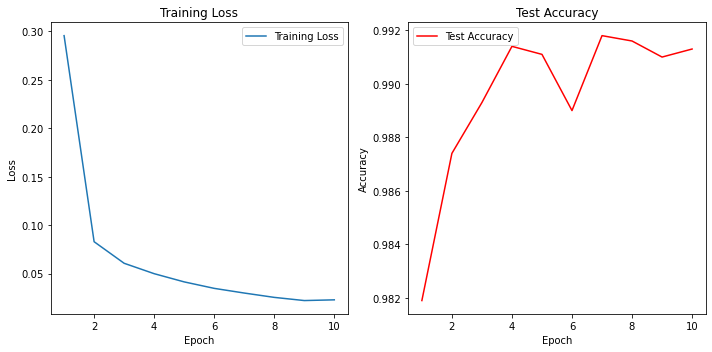

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# Define the CNN architecture in PyTorch
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.dropout1 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.25)
        self.fc3 = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = self.flatten(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout1(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = CNN(num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store the training loss and test accuracy
train_losses = []
test_accuracies = []

# Training the model
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Calculate average training loss for the epoch
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {train_loss}")

    # Evaluation on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_accuracies.append(test_accuracy)
    print(f'Test accuracy: {test_accuracy}')

# Plotting the training loss and test accuracy
plt.figure(figsize=(10, 5))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plotting test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', color='r')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


    

Files already downloaded and verified


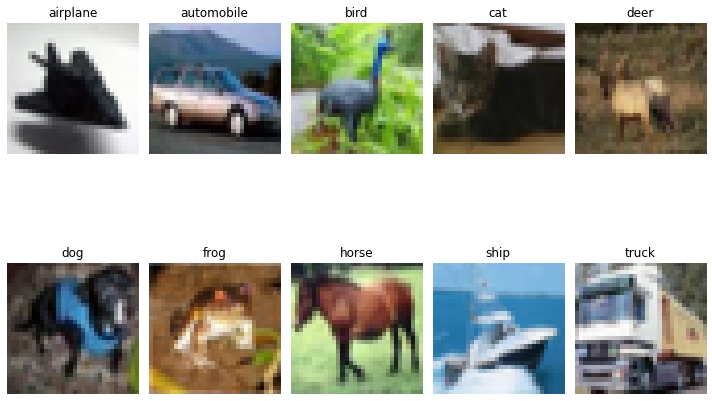

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋을 로드합니다.
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

# 데이터셋의 클래스 레이블을 가져옵니다.
classes = train_dataset.classes

# 각 클래스에 속하는 첫 번째 데이터를 가져와서 이미지와 함께 출력합니다.
plt.figure(figsize=(10, 8))
for class_name in classes:
    found = False
    for i, (image, label) in enumerate(train_dataset):
        if label == classes.index(class_name):
            # 이미지 출력
            plt.subplot(2, 5, classes.index(class_name) + 1) # 이 부분 조금 헷갈렸네
            plt.imshow(image.permute(1, 2, 0))  # 이미지 차원 순서 변경 (C, H, W) -> (H, W, C)
            plt.title(class_name)
            plt.axis('off')
            found = True
            break
    if not found:
        print(f"No data found for class {class_name}")

plt.tight_layout()
plt.show()


Files already downloaded and verified
Files already downloaded and verified


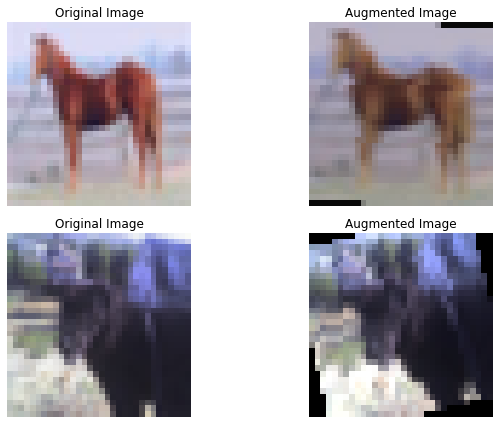

In [8]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 다운로드 및 저장 경로 설정
data_root = 'C:/Users/Owner/data'
train_dataset = CIFAR10(root=data_root, train=True, download=True, transform=transforms.ToTensor())
test_dataset = CIFAR10(root=data_root, train=False, download=True, transform=transforms.ToTensor())

# 데이터로더 설정
batch_size = 1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 데이터 부풀리기를 위한 변환 설정
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0)),
])

# 원본 이미지와 부풀린 이미지 비교를 위한 반복문
num_images_to_show = 2  # 비교할 이미지 수
fig, axes = plt.subplots(num_images_to_show, 2, figsize=(10, 6))

for idx, (img, _) in enumerate(train_loader):
    if idx >= num_images_to_show:
        break
    
    original_img = transforms.ToPILImage()(img.squeeze())  # 텐서를 PIL 이미지로 변환
    axes[idx, 0].imshow(original_img)
    axes[idx, 0].set_title('Original Image')
    axes[idx, 0].axis('off')
    
    # 같은 이미지에 부풀리기를 적용하여 비교
    augmented_img = data_transforms(img.squeeze())  # 변환 적용
    augmented_img = transforms.ToPILImage()(augmented_img)
    axes[idx, 1].imshow(augmented_img)
    axes[idx, 1].set_title('Augmented Image')
    axes[idx, 1].axis('off')

plt.tight_layout()
plt.show()
